# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [1237]:
print("Нам нужна полная воспроизводимость резльтатов при проверке")

Нам нужна полная воспроизводимость резльтатов при проверке


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [1238]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [1239]:
df_train.loc[np.random.randint(0, len(df_train)+1, 5)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
860,Renault KWID RXT,2016,330000,20000,Petrol,Individual,Manual,First Owner,25.17 kmpl,799 CC,53.3 bhp,72Nm@ 4386rpm,5.0
5390,Maruti Ertiga ZDI Plus,2017,825000,79000,Diesel,Dealer,Manual,First Owner,25.47 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,7.0
5226,Hyundai Xcent 1.2 VTVT SX,2020,524000,32000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
5191,Mahindra XUV500 W10 2WD,2015,850000,140000,Diesel,Individual,Manual,First Owner,16.0 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.0
3772,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [1240]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [1241]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [1242]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [1243]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [1244]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [1245]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [1246]:
df_train.drop(["selling_price"], axis = 1).duplicated().sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [1247]:
''' отображаем дубликаты -1 уникальное значение'''
df_train[df_train.drop(["selling_price"], axis = 1).duplicated()].sort_values(["name"])



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1595,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6778,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
3623,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
2293,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5652,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [1248]:
''' отображаем не уникальные значения (пары, тройки и тд)'''
df_train[df_train.drop(["selling_price"], axis = 1).duplicated(keep=False)].sort_values(["name"])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
1568,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
361,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [1249]:
df_train = df_train.drop_duplicates(subset = list(df_train.drop(["selling_price"], axis = 1).columns))
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [1250]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [1251]:
df_train = df_train.reset_index(drop = True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [1252]:
df_train.mileage = df_train.mileage.str[:-5].replace("", None).astype(float)
df_train.engine = df_train.engine.str[:-2].replace("", None).astype(float)
df_train.max_power = df_train.max_power.str[:-4].replace("", None).astype(float)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [1253]:
df_test.mileage = df_test.mileage.str[:-5].replace("", None).astype(float)
df_test.engine = df_test.engine.str[:-2].replace("", None).astype(float)
df_test.max_power = df_test.max_power.str[:-4].replace("", None).astype(float)
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,111.8Nm@ 4000rpm,5.0


In [1254]:
torque = []
max_torque_rpm = []

for i in df_train["torque"]:
    try:
        if "Nm" in i or "nm" in i:
            l = []
            for j in i:
                if (j.isalpha() == False or j == "."):
                    l.append(j)
                else:
                    break
            torque.append(int("".join(l)))

        elif "kgm" in i or "Kgm" in i:
            l = []
            for j in i:
                if (j.isalpha() == False or j == "."):
                    l.append(j)
                else:
                    break
            torque.append(int("".join(l)) * 9.8)
        else:
            torque.append(None)
    except:
        torque.append(None)
    
    try:
        if "rpm" in i:
            lz = [int(k.replace(",", "")) for k in re.findall("\d,\d\d\d", i)]
            l = [int(k) for k in re.findall("\d\d\d\d", i)]

            max_torque_rpm.append(max(max(lz, l)))
        else:
            max_torque_rpm.append(None)
    except:
        max_torque_rpm.append(None)
        
        
        
print(len(torque))
print(len(max_torque_rpm))

df_train.torque = torque
df_train["max_torque_rpm"] = max_torque_rpm

5840
5840


In [1255]:
torque = []
max_torque_rpm = []

for i in df_test["torque"]:
    try:
        if "Nm" in i or "nm" in i:
            l = []
            for j in i:
                if (j.isalpha() == False or j == "."):
                    l.append(j)
                else:
                    break
            torque.append(int("".join(l)))

        elif "kgm" in i or "Kgm" in i:
            l = []
            for j in i:
                if (j.isalpha() == False or j == "."):
                    l.append(j)
                else:
                    break
            torque.append(int("".join(l)) * 9.8)
        else:
            torque.append(None)
    except:
        torque.append(None)
    
    try:
        if "rpm" in i:
            lz = [int(k.replace(",", "")) for k in re.findall("\d,\d\d\d", i)]
            l = [int(k) for k in re.findall("\d\d\d\d", i)]

            max_torque_rpm.append(max(max(lz, l)))
        else:
            max_torque_rpm.append(None)
    except:
        max_torque_rpm.append(None)
        
        
        
print(len(torque))
print(len(max_torque_rpm))

df_test.torque = torque
df_test["max_torque_rpm"] = max_torque_rpm

1000
1000


In [1256]:
df_train.isna().sum()

name                 0
year                 0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage            186
engine             186
max_power          187
torque            1470
seats              186
max_torque_rpm     213
dtype: int64

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [1257]:
df_train = df_train.fillna(df_train.median())

/var/folders/kt/yk0_nsd528328z34bncg8ypw0000gq/T/ipykernel_54896/770329630.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [1258]:
df_test = df_test.fillna(df_train.median())

/var/folders/kt/yk0_nsd528328z34bncg8ypw0000gq/T/ipykernel_54896/2508925867.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.




(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [1259]:
'''
Для категориальных признаков можно придумать множество эвристик, которые позволят более логично учитывать
их. Но что мб даже более важно, не будет смещения важности категории из-за её обазначения, ведь модель 
будет считать категорию 5 более важной чем категорию 1 при прочих равных.
'''

'\nДля категориальных признаков можно придумать множество эвристик, которые позволят более логично учитывать\nих. Но что мб даже более важно, не будет смещения важности категории из-за её обазначения, ведь модель \nбудет считать категорию 5 более важной чем категорию 1 при прочих равных.\n'

In [1260]:
df_train.engine = df_train.engine.astype(int)
df_test.engine = df_test.engine.astype(int)

df_train.seats = df_train.seats.astype(int)
df_test.seats = df_test.seats.astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [1261]:
num_col = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'seats']
cat_col = ['fuel', 'seller_type', 'transmission', 'owner']
target_col = ['selling_price']

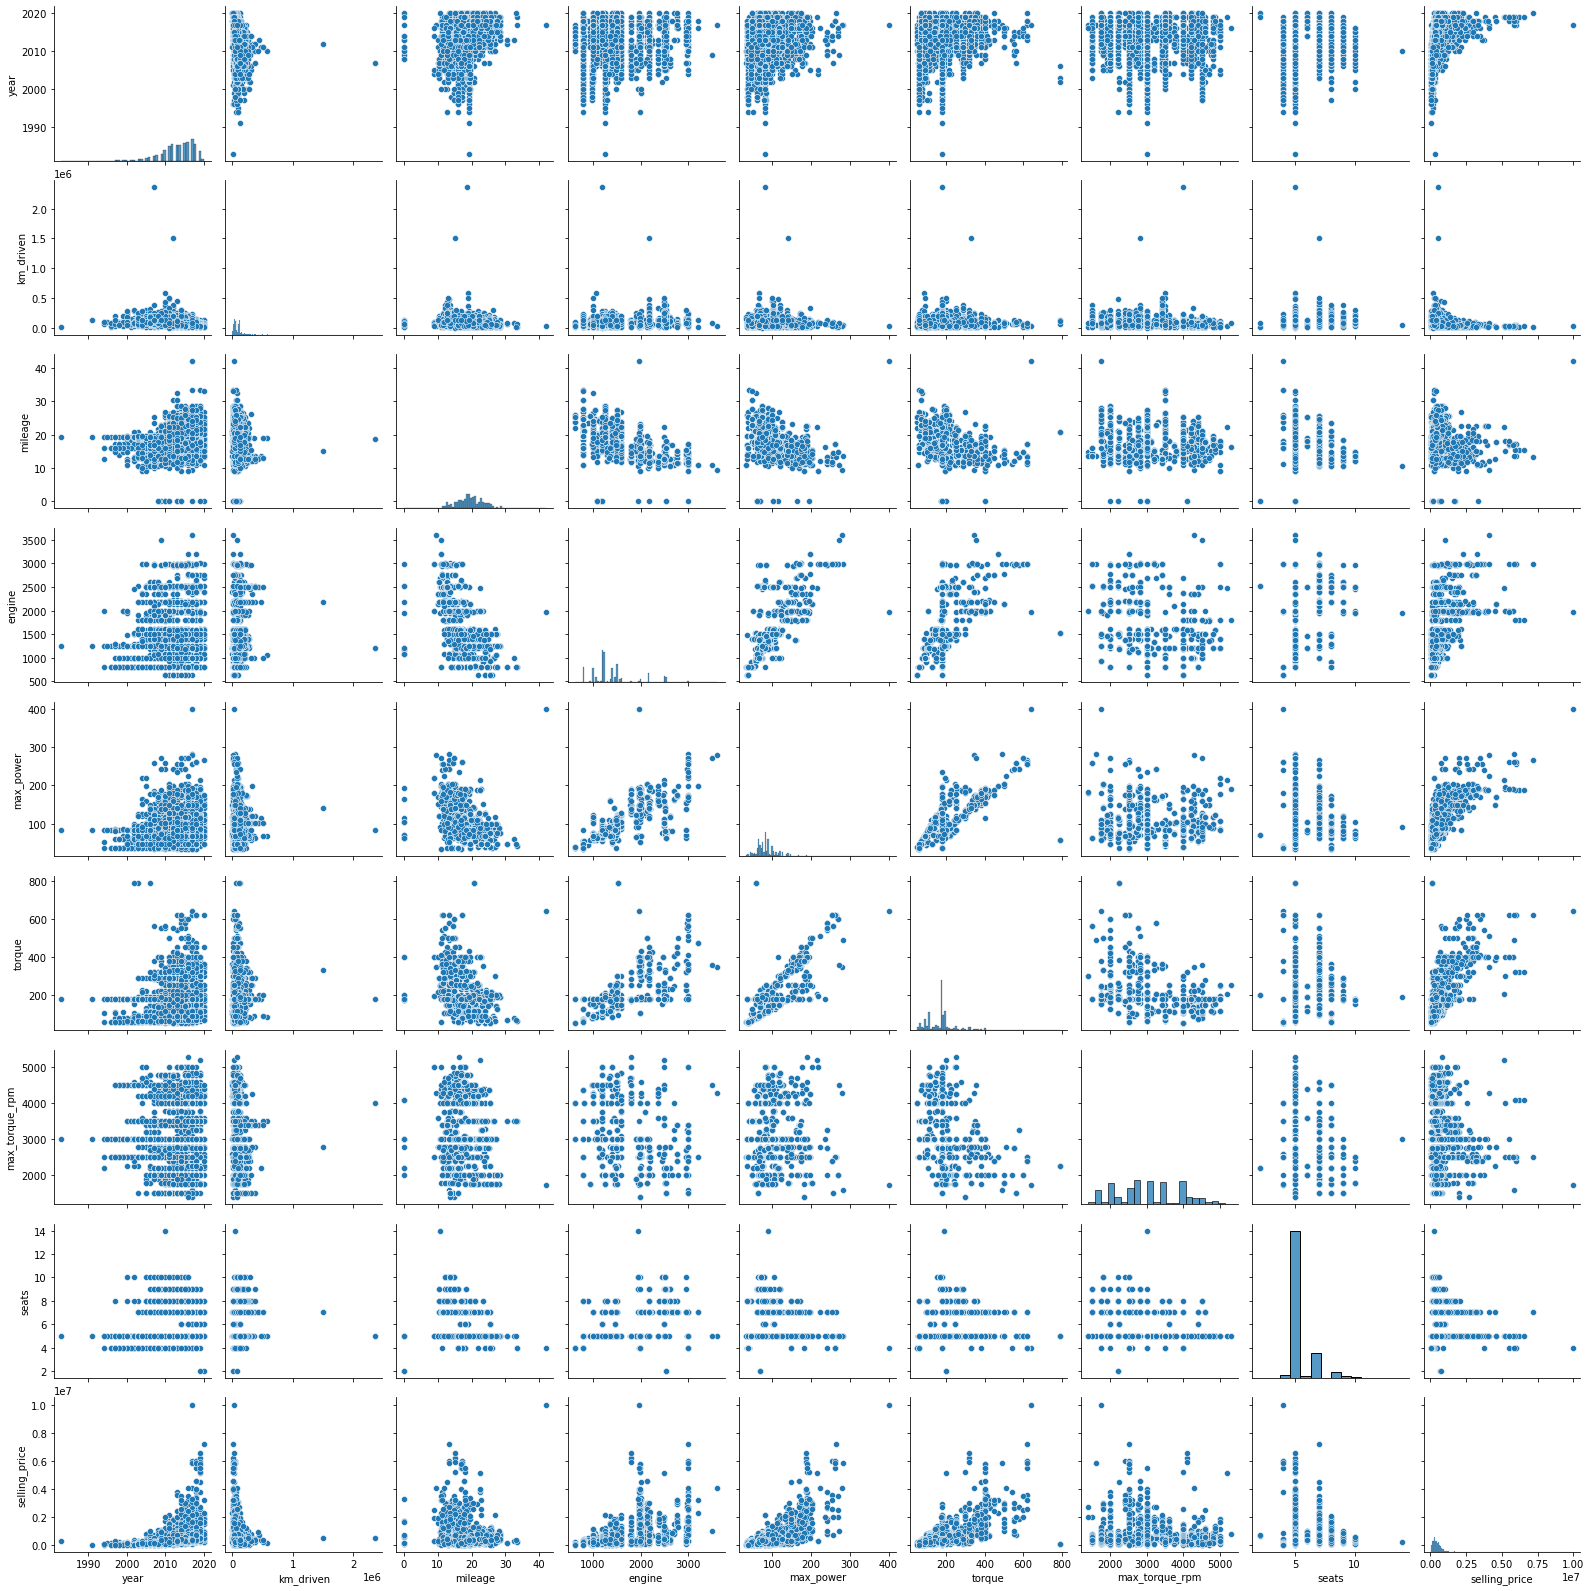

In [1262]:
sns.pairplot(df_train[num_col + target_col])

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [1263]:
''' 
Большинство признаков имеют около линейную зависимость с целевой переменной, и это хорошо.
Но среди признаков есть линейные зависимости, что не совсем хорошо, так как они будут 
давать похожий вклад в модель.
'''

' \nБольшинство признаков имеют около линейную зависимость с целевой переменной, и это хорошо.\nНо среди признаков есть линейные зависимости, что не совсем хорошо, так как они будут \nдавать похожий вклад в модель.\n'

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

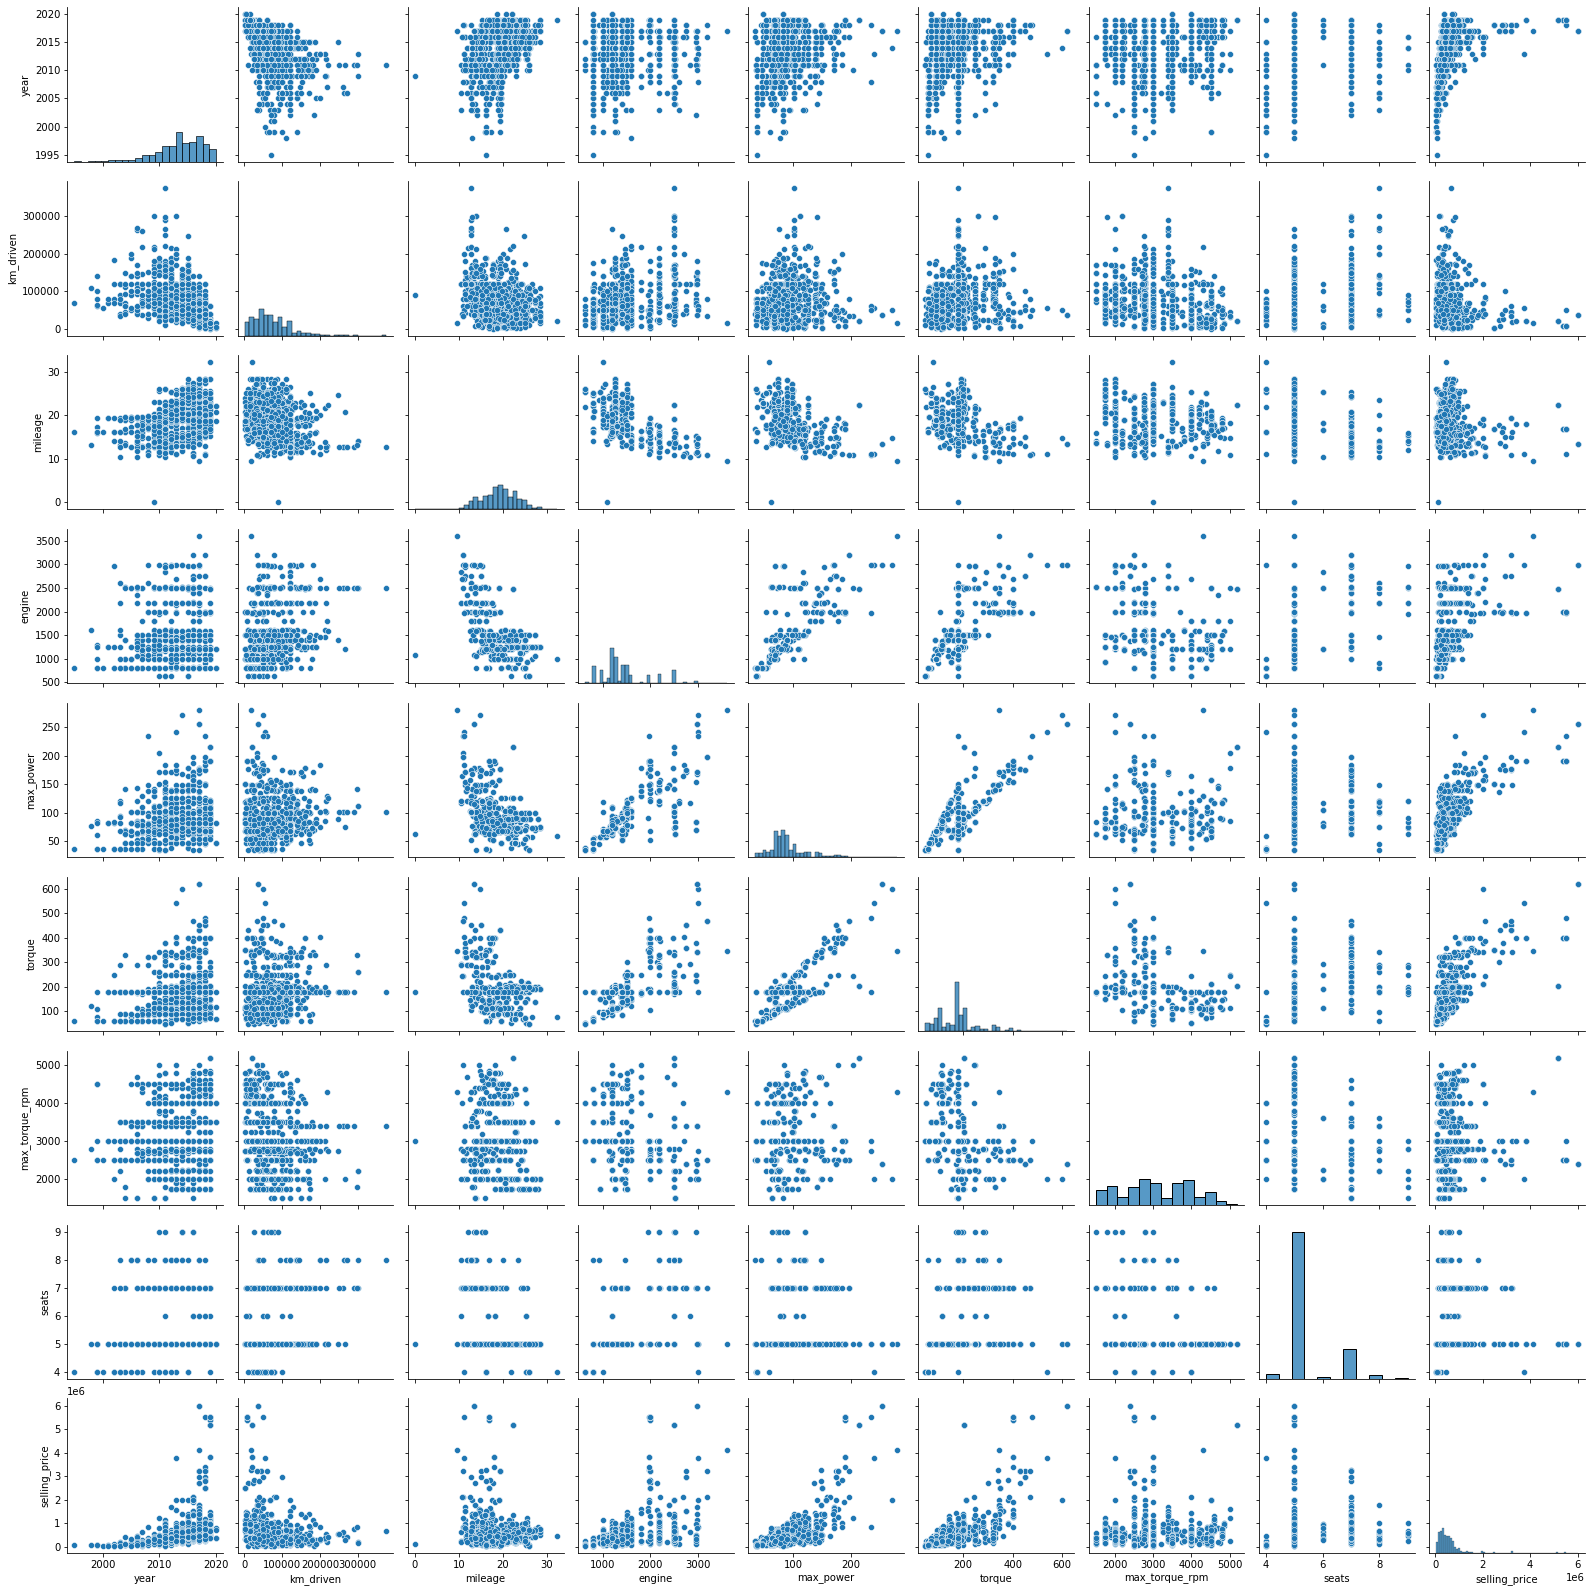

In [1264]:
sns.pairplot(df_test[num_col + target_col])

In [1265]:
''' 
Да, данные в тесте похожи на данные в трэйне'''

' \nДа, данные в тесте похожи на данные в трэйне'

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

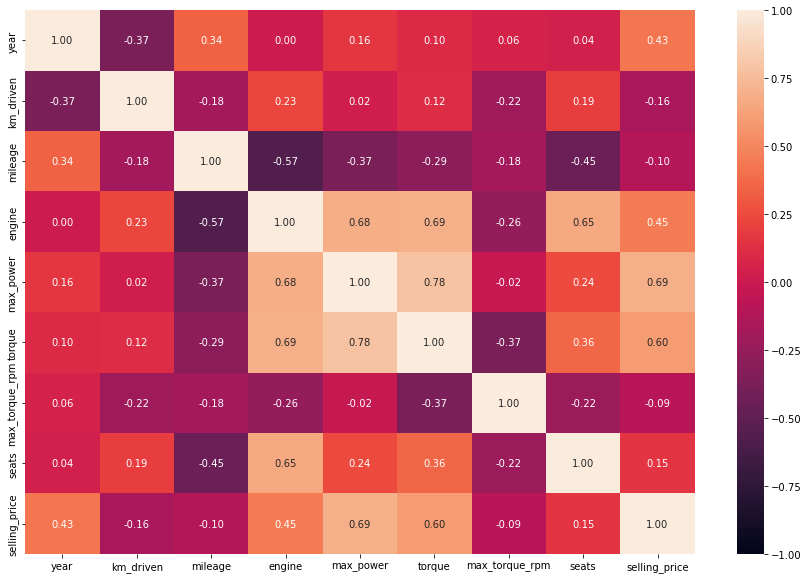

In [1266]:
plt.figure(figsize = (15, 10))
sns.heatmap(df_train[num_col + target_col].corr(), annot=True, fmt=".2f", vmin= -1, vmax = 1)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [1267]:
'''
1)engine и year
2)max_power и torque, engine и torque, max_power и engine
3)Да
'''

'\n1)engine и year\n2)max_power и torque, engine и torque, max_power и engine\n3)Да\n'

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

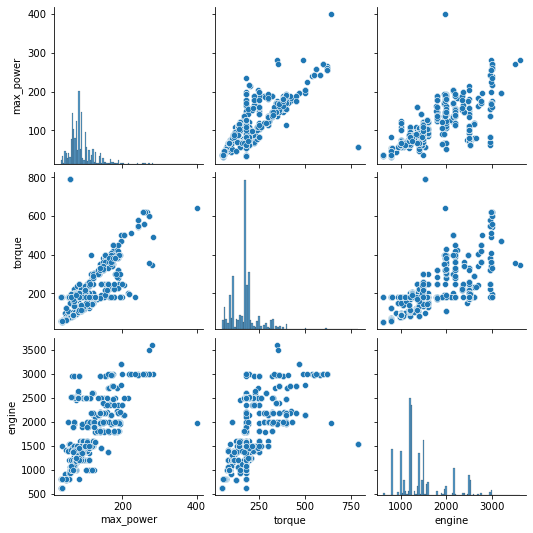

In [1268]:
sns.pairplot(df_train[["max_power", "torque", "engine"]])

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

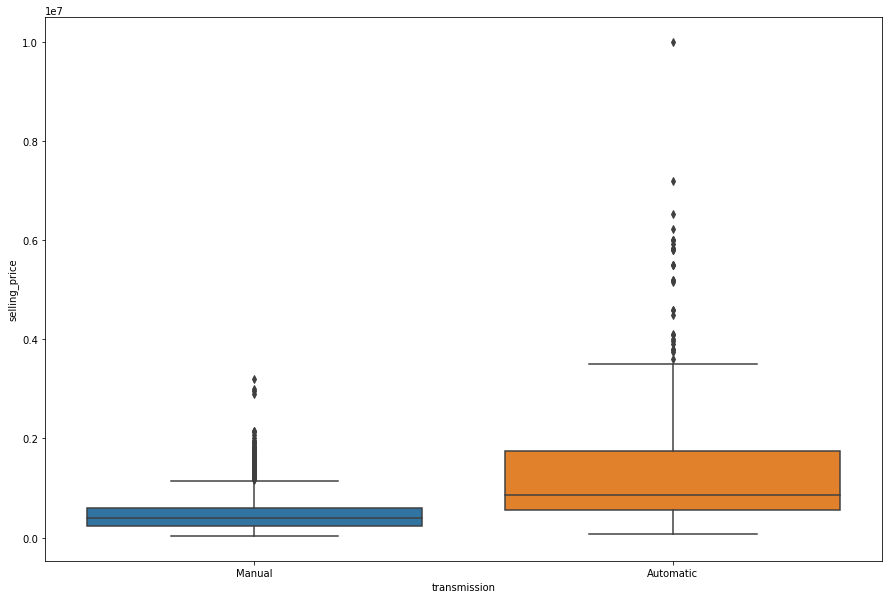

In [1269]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = df_train, x = "transmission", y = target_col[0])

In [1270]:
''' 
Автомобили с автоматической коробкой передач стоят сильно больше чем с механической'''

' \nАвтомобили с автоматической коробкой передач стоят сильно больше чем с механической'

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [1271]:
y_train = df_train[target_col]
X_train = df_train[num_col]

In [1272]:
assert X_train.shape == (5840, 8)

In [1273]:
y_test = df_test[target_col]
X_test = df_test[num_col]

In [1274]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [1275]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"r2={r2_score(y_test, y_pred)}, MSE={MSE(y_test, y_pred)}")

r2=0.6072996945926044, MSE=225735349356.1092


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [1276]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"r2={r2_score(y_test, y_pred)}, MSE={MSE(y_test, y_pred)}")

r2=0.6072996945926041, MSE=225735349356.10938


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [1277]:
data_fut_imp = pd.DataFrame(data={'score': list(map(abs, lr.coef_.tolist()[0]))}, index = num_col)
importances_col = data_fut_imp.sort_values(by='score', ascending = False)

In [1278]:
importances_col

,score
max_power,288001.551956
year,165539.469684
torque,70001.335229
km_driven,49575.747612
max_torque_rpm,42719.644004
seats,33276.167590
engine,10766.985516
mileage,10055.755855


In [1279]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=importances_col.index, y=importances_col.score)])

fig.update_layout(height = 800, width = 1000, title = 'Важность признаков', titlefont={'size': 30})

fig.show()

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [1280]:
from sklearn.linear_model import Lasso

lr = Lasso()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"r2={r2_score(y_test, y_pred)}, MSE={MSE(y_test, y_pred)}")

r2=0.6072984392732144, MSE=225736070949.54108


In [1281]:
lr.coef_

array([165537.13889369, -49574.81171227, -10052.17821794,  10765.17293711,
       288002.17952819,  70001.80953829, -42717.05971684, -33272.2051916 ])

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [1282]:
data_fut_imp = pd.DataFrame(data={'score': list(map(abs, lr.coef_.tolist()))}, index = num_col)
importances_col = data_fut_imp.sort_values(by='score', ascending = False)

fig = go.Figure([go.Bar(x=importances_col.index, y=importances_col.score)])

fig.update_layout(height = 800, width = 1000, title = 'Важность признаков', titlefont={'size': 30})

fig.show()

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [1283]:
%%time

from sklearn.model_selection import GridSearchCV

params = {"alpha": np.arange(0.0001, 1.0002, 0.05)
            }

grid = GridSearchCV(Lasso(), params, cv = 10, scoring="r2")
grid.fit(X_train, y_train)

CPU times: user 6.99 s, sys: 1.68 s, total: 8.67 s
Wall time: 1.29 s


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.0000e-04, 5.0100e-02, 1.0010e-01, 1.5010e-01, 2.0010e-01,
       2.5010e-01, 3.0010e-01, 3.5010e-01, 4.0010e-01, 4.5010e-01,
       5.0010e-01, 5.5010e-01, 6.0010e-01, 6.5010e-01, 7.0010e-01,
       7.5010e-01, 8.0010e-01, 8.5010e-01, 9.0010e-01, 9.5010e-01,
       1.0001e+00])},
             scoring='r2')

In [1284]:
grid.best_params_

{'alpha': 1.0001}

In [1285]:
grid.best_score_

0.5810027366670789

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [1286]:
200

200

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [1287]:
lr = Lasso(alpha = 1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"r2={r2_score(y_test, y_pred)}, MSE={MSE(y_test, y_pred)}")

r2=0.6072984392732144, MSE=225736070949.54108


In [1288]:
data_fut_imp = pd.DataFrame(data={'score': list(map(abs, lr.coef_.tolist()))}, index = num_col)
importances_col = data_fut_imp.sort_values(by='score', ascending = False)

fig = go.Figure([go.Bar(x=importances_col.index, y=importances_col.score)])

fig.update_layout(height = 800, width = 1000, title = 'Важность признаков', titlefont={'size': 30})

fig.show()

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [1289]:
from sklearn.linear_model import ElasticNet

params = {"alpha": np.arange(0.0001, 1.0002, 0.05),
          "l1_ratio": np.arange(0.0001, 1.0002, 0.05)
            }

grid = GridSearchCV(ElasticNet(), params, cv = 10, scoring="r2")
grid.fit(X_train, y_train)

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


210 fits failed out of a total of 4410.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py", line 925, in fit
    raise ValueError(
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.0001


/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-package

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([1.0000e-04, 5.0100e-02, 1.0010e-01, 1.5010e-01, 2.0010e-01,
       2.5010e-01, 3.0010e-01, 3.5010e-01, 4.0010e-01, 4.5010e-01,
       5.0010e-01, 5.5010e-01, 6.0010e-01, 6.5010e-01, 7.0010e-01,
       7.5010e-01, 8.0010e-01, 8.5010e-01, 9.0010e-01, 9.5010e-01,
       1.0001e+00]),
                         'l1_ratio': array([1.0000e-04, 5.0100e-02, 1.0010e-01, 1.5010e-01, 2.0010e-01,
       2.5010e-01, 3.0010e-01, 3.5010e-01, 4.0010e-01, 4.5010e-01,
       5.0010e-01, 5.5010e-01, 6.0010e-01, 6.5010e-01, 7.0010e-01,
       7.5010e-01, 8.0010e-01, 8.5010e-01, 9.0010e-01, 9.5010e-01,
       1.0001e+00])},
             scoring='r2')

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [1290]:
grid.best_params_

{'alpha': 0.8001, 'l1_ratio': 0.8001}

In [1291]:
grid.best_score_

0.5880195511693802

In [1292]:
lr = ElasticNet(alpha = 0.8001, l1_ratio = 0.8001)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"r2={r2_score(y_test, y_pred)}, MSE={MSE(y_test, y_pred)}")

r2=0.5798189677229275, MSE=241532055890.50012


In [1293]:
data_fut_imp = pd.DataFrame(data={'score': list(map(abs, lr.coef_.tolist()))}, index = num_col)
importances_col = data_fut_imp.sort_values(by='score', ascending = False)

fig = go.Figure([go.Bar(x=importances_col.index, y=importances_col.score)])

fig.update_layout(height = 800, width = 1000, title = 'Важность признаков', titlefont={'size': 30})

fig.show()

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [1294]:
X_train_cat = df_train[num_col+cat_col]
X_test_cat = df_test[num_col+cat_col]

In [1295]:
assert X_train_cat.shape == (5840, 12)

In [1296]:
X_train_cat.shape

(5840, 12)

In [1297]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [1298]:
X_train_cat.seats = X_train_cat.seats.astype(object)
X_test_cat.seats = X_train_cat.seats.astype(object)

/var/folders/kt/yk0_nsd528328z34bncg8ypw0000gq/T/ipykernel_54896/1791827724.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kt/yk0_nsd528328z34bncg8ypw0000gq/T/ipykernel_54896/1791827724.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1299]:
cat_col.append("seats")

In [1300]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
ohe = OneHotEncoder()
X_train_cat = pd.concat([X_train_cat, pd.DataFrame(ohe.fit_transform(X_train_cat[cat_col]).toarray())], axis = 1)
X_test_cat = pd.concat([X_test_cat, pd.DataFrame(ohe.transform(X_test_cat[cat_col]).toarray())], axis = 1)

In [1301]:
X_train_cat = X_train_cat.drop(cat_col, axis = 1)
X_test_cat = X_test_cat.drop(cat_col, axis = 1)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [1302]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {"alpha": np.arange(0.0001, 1.0002, 0.05)}

grid = GridSearchCV(Ridge(), params, cv = 10, scoring="r2")
grid.fit(X_train_cat, y_train)

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=4.9989e-18): result may not be accurate.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.0000e-04, 5.0100e-02, 1.0010e-01, 1.5010e-01, 2.0010e-01,
       2.5010e-01, 3.0010e-01, 3.5010e-01, 4.0010e-01, 4.5010e-01,
       5.0010e-01, 5.5010e-01, 6.0010e-01, 6.5010e-01, 7.0010e-01,
       7.5010e-01, 8.0010e-01, 8.5010e-01, 9.0010e-01, 9.5010e-01,
       1.0001e+00])},
             scoring='r2')

In [1303]:
grid.best_params_

{'alpha': 1.0001}

In [1304]:
grid.best_score_

0.6348833780757375

In [1305]:
lr = Ridge(alpha = 1)
lr.fit(X_train_cat, y_train)
y_pred = lr.predict(X_test_cat)
print(f"r2={r2_score(y_test, y_pred)}, MSE={MSE(y_test, y_pred)}")

r2=0.6331597758251246, MSE=210870236212.5268


/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

1) Новые признаки

In [1306]:
df_train["year_2"] = df_train.year ** 2
df_train["max_torque_rpm/engine"] = df_train["max_torque_rpm"]/df_train["torque"]
df_train["km_driven/year"] = df_train["km_driven"]/-(df_train["year"]-2022)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm,year_2,max_torque_rpm/engine,km_driven/year
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5,2000.0,4056196,10.526316,18187.500000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5,2500.0,4056196,10.000000,15000.000000
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,180.0,5,2750.0,4040100,15.277778,10583.333333
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,180.0,5,4500.0,4028049,25.000000,8000.000000
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,180.0,5,4000.0,4068289,22.222222,9000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,180.0,5,3000.0,4032064,16.666667,13642.857143
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.0,5,3500.0,4052169,38.888889,5555.555556
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,180.0,5,4000.0,4052169,22.222222,12222.222222
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,180.0,5,2750.0,4028049,15.277778,7933.333333


In [1307]:
df_test["year_2"] = df_test.year ** 2
df_test["max_torque_rpm/engine"] = df_test["max_torque_rpm"]/df_test["torque"]
df_test["km_driven/year"] = df_test["km_driven"]/-(df_test["year"]-2022)
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm,year_2,max_torque_rpm/engine,km_driven/year
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498,112.00,260.0,7,2200.0,4040100,8.461538,14000.000000
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497,108.50,260.0,5,2750.0,4068289,10.576923,5000.000000
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799,130.00,172.0,5,4300.0,4028049,25.000000,14564.200000
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498,98.60,200.0,5,1750.0,4060225,8.750000,24714.285714
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172,65.00,96.0,5,3000.0,4044121,31.250000,6363.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086,68.05,180.0,5,4500.0,4032064,25.000000,7142.857143
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197,81.83,180.0,5,4000.0,4068289,22.222222,10000.000000
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,180.0,5,2750.0,4036081,15.277778,3076.923077
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197,78.90,180.0,5,4000.0,4048144,22.222222,2500.000000


In [1308]:
num_col = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 
           'torque', 'max_torque_rpm', 'year_2', 'max_torque_rpm/engine',
           'km_driven/year']

cat_col = ['fuel', 'seller_type','transmission', 'owner', 'seats']

target = ['selling_price']

In [1309]:
X_train_cat = df_train[num_col+cat_col]
X_test_cat = df_test[num_col+cat_col]

In [1310]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
ohe = OneHotEncoder()
X_train_cat = pd.concat([X_train_cat, pd.DataFrame(ohe.fit_transform(X_train_cat[cat_col]).toarray())], axis = 1)
X_test_cat = pd.concat([X_test_cat, pd.DataFrame(ohe.transform(X_test_cat[cat_col]).toarray())], axis = 1)

In [1311]:
X_train_cat = X_train_cat.drop(cat_col, axis = 1)
X_test_cat = X_test_cat.drop(cat_col, axis = 1)

In [1312]:
lr = Ridge(alpha = 1)
lr.fit(X_train_cat, y_train)
y_pred = lr.predict(X_test_cat)
print(f"r2={r2_score(y_test, y_pred)}, MSE={MSE(y_test, y_pred)}")

r2=0.6687734791685819, MSE=190398462558.67117


/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



2) Добычна новых признаков

In [1313]:
df_train.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

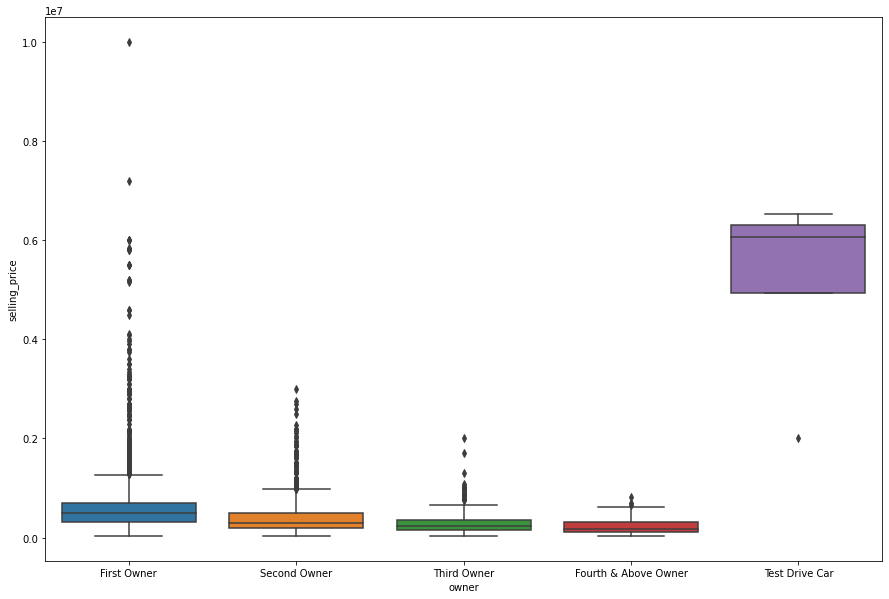

In [1314]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = df_train, x = "owner", y = target_col[0])

In [1315]:
df_train["owner"].value_counts()

First Owner             3603
Second Owner            1639
Third Owner              454
Fourth & Above Owner     140
Test Drive Car             4
Name: owner, dtype: int64

In [1316]:
df_test["owner"].value_counts()

First Owner             623
Second Owner            278
Third Owner              71
Fourth & Above Owner     27
Test Drive Car            1
Name: owner, dtype: int64

In [1317]:
df_train["owner"][(df_train["owner"] == "Second Owner") | (df_train["owner"] == "Third Owner") | 
                 (df_train["owner"] == "Fourth & Above Owner")] = "Second & Above Owner"

/var/folders/kt/yk0_nsd528328z34bncg8ypw0000gq/T/ipykernel_54896/3719580757.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1318]:
df_test["owner"][(df_test["owner"] == "Second Owner") | (df_test["owner"] == "Third Owner") | 
                 (df_test["owner"] == "Fourth & Above Owner")] = "Second & Above Owner"

/var/folders/kt/yk0_nsd528328z34bncg8ypw0000gq/T/ipykernel_54896/1503465384.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1319]:
X_train_cat = df_train[num_col+cat_col]
X_test_cat = df_test[num_col+cat_col]

In [1320]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
ohe = OneHotEncoder()
X_train_cat = pd.concat([X_train_cat, pd.DataFrame(ohe.fit_transform(X_train_cat[cat_col]).toarray())], axis = 1)
X_test_cat = pd.concat([X_test_cat, pd.DataFrame(ohe.transform(X_test_cat[cat_col]).toarray())], axis = 1)

In [1321]:
X_train_cat = X_train_cat.drop(cat_col, axis = 1)
X_test_cat = X_test_cat.drop(cat_col, axis = 1)

In [1322]:
lr = Ridge(alpha = 1)
lr.fit(X_train_cat, y_train)
y_pred = lr.predict(X_test_cat)
print(f"r2={r2_score(y_test, y_pred)}, MSE={MSE(y_test, y_pred)}")

r2=0.6678251960076792, MSE=190943562798.38913


/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



3) Обработка выбросов

In [1323]:
for i in num_col:
    q5 = df_train[i].quantile(0.05)
    q95 = df_train[i].quantile(0.95)
    
    df_train[i][df_train[i] > q95] = q95
    df_train[i][df_train[i] < q5] = q5


/var/folders/kt/yk0_nsd528328z34bncg8ypw0000gq/T/ipykernel_54896/2740467538.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kt/yk0_nsd528328z34bncg8ypw0000gq/T/ipykernel_54896/2740467538.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1324]:
q5 = df_train['selling_price'].quantile(0.05)
q95 = df_train['selling_price'].quantile(0.95)
    
df_train['selling_price'][df_train['selling_price'] > q95] = q95
df_train['selling_price'][df_train['selling_price'] < q5] = q5

/var/folders/kt/yk0_nsd528328z34bncg8ypw0000gq/T/ipykernel_54896/3127799622.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1325]:
X_train_cat = df_train[num_col+cat_col]
X_test_cat = df_test[num_col+cat_col]

In [1326]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
ohe = OneHotEncoder()
X_train_cat = pd.concat([X_train_cat, pd.DataFrame(ohe.fit_transform(X_train_cat[cat_col]).toarray())], axis = 1)
X_test_cat = pd.concat([X_test_cat, pd.DataFrame(ohe.transform(X_test_cat[cat_col]).toarray())], axis = 1)

In [1327]:
X_train_cat = X_train_cat.drop(cat_col, axis = 1)
X_test_cat = X_test_cat.drop(cat_col, axis = 1)

In [1328]:
lr = Ridge(alpha = 1)
lr.fit(X_train_cat, y_train)
y_pred = lr.predict(X_test_cat)
print(f"r2={r2_score(y_test, y_pred)}, MSE={MSE(y_test, y_pred)}")

r2=0.6834627958602442, MSE=181954623861.48727


/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



4) Используем марку машины

In [1329]:
name = []

for i in df_train.name:
    name.append(i.split()[0])
df_train.name = name

In [1330]:
name = []

for i in df_test.name:
    name.append(i.split()[0])
df_test.name = name

In [1331]:
above_name = list(df_train.name.value_counts()[df_train.name.value_counts() < 10].keys())
names = list(df_train.name.value_counts()[df_train.name.value_counts() >= 10].keys())

In [1332]:
name = []

for i in df_train.name:
    if i in above_name:
        name.append("above")
    else:
        name.append(i)
df_train.name = name

In [1333]:
name = []

for i in df_test.name:
    if i in names:
        name.append(i)
    else:
        name.append("above")
df_test.name = name

In [1334]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm,year_2,max_torque_rpm/engine,km_driven/year
0,Maruti,2014,450000.0,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5,2000.0,4056196,10.526316,18187.500000
1,Skoda,2014,370000.0,120000,Diesel,Individual,Manual,Second & Above Owner,21.14,1498,103.52,250.0,5,2500.0,4056196,10.000000,15000.000000
2,Hyundai,2010,225000.0,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,180.0,5,2750.0,4040100,15.277778,10583.333333
3,Maruti,2007,130000.0,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,180.0,5,4500.0,4028049,25.000000,8000.000000
4,Hyundai,2017,440000.0,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,180.0,5,4000.0,4068289,22.222222,9000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai,2008,120000.0,156041,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,180.0,5,3000.0,4032064,16.666667,13642.857143
5836,Maruti,2013,260000.0,50000,Petrol,Individual,Manual,Second & Above Owner,18.90,998,67.10,90.0,5,3500.0,4052169,38.888889,5555.555556
5837,Hyundai,2013,320000.0,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,180.0,5,4000.0,4052169,22.222222,12222.222222
5838,Hyundai,2007,135000.0,119000,Diesel,Individual,Manual,Second & Above Owner,16.80,1493,110.00,180.0,5,2750.0,4028049,15.277778,7933.333333


In [1335]:
num_col = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 
           'torque', 'max_torque_rpm', 'year_2', 'max_torque_rpm/engine',
           'km_driven/year']

cat_col = ['fuel', 'seller_type','transmission', 'owner', 'seats', 'name']

target = ['selling_price']

In [1336]:
X_train_cat = df_train[num_col+cat_col]
X_test_cat = df_test[num_col+cat_col]

In [1337]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
ohe = OneHotEncoder()
X_train_cat = pd.concat([X_train_cat, pd.DataFrame(ohe.fit_transform(X_train_cat[cat_col]).toarray())], axis = 1)
X_test_cat = pd.concat([X_test_cat, pd.DataFrame(ohe.transform(X_test_cat[cat_col]).toarray())], axis = 1)

In [1338]:
X_train_cat = X_train_cat.drop(cat_col, axis = 1)
X_test_cat = X_test_cat.drop(cat_col, axis = 1)

In [1339]:
lr = Ridge(alpha = 1)
lr.fit(X_train_cat, y_train)
y_pred = lr.predict(X_test_cat)
print(f"r2={r2_score(y_test, y_pred)}, MSE={MSE(y_test, y_pred)}")

r2=0.7737237587302124, MSE=130070044944.40819


/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



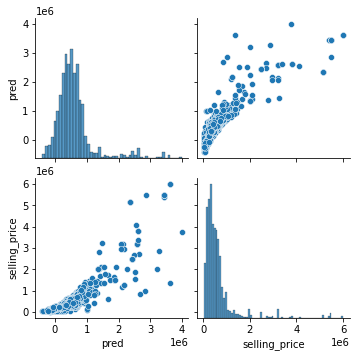

In [1341]:
y_test_pred = y_test.copy()
y_test_pred["pred"] = y_pred
sns.pairplot(y_test_pred[["pred", "selling_price"]])

5) Разделим машины на категории

<AxesSubplot:xlabel='name'>

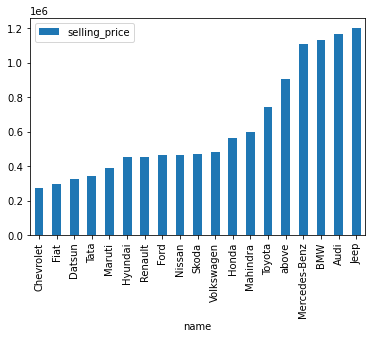

In [1356]:
df_train.groupby("name", as_index = 0).mean()[["name", "selling_price"]].sort_values("selling_price").plot.bar(x='name', y = "selling_price")

In [1357]:
df_train.name.unique()

array(['Maruti', 'Skoda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Honda', 'Chevrolet', 'Fiat', 'Datsun', 'Tata', 'Jeep',
       'Mercedes-Benz', 'above', 'Audi', 'Volkswagen', 'BMW', 'Nissan'],
      dtype=object)

In [1362]:
elit = ["Jeep", 'Audi', 'BMW', 'Mercedes-Benz', 'above']
middle = ['Toyota', 'Mahindra', 'Honda', 'Volkswagen', 'Skoda', 'Nissan', 'Ford', 'Renault', 'Hyundai', 'Maruti']
stock = ['Tata', 'Datsun', 'Fiat', 'Chevrolet']

In [1363]:
name = []

for i in df_train.name:
    if i in elit:
        name.append("elit")
    elif i in middle:
        name.append("middle")
    elif i in stock:
        name.append("stock")
        
df_train.name = name

In [1364]:
name = []

for i in df_test.name:
    if i in elit:
        name.append("elit")
    elif i in middle:
        name.append("middle")
    elif i in stock:
        name.append("stock")
    else:
        name.append("middle")
        
df_test.name = name

In [1365]:
X_train_cat = df_train[num_col+cat_col]
X_test_cat = df_test[num_col+cat_col]

In [1366]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
ohe = OneHotEncoder()
X_train_cat = pd.concat([X_train_cat, pd.DataFrame(ohe.fit_transform(X_train_cat[cat_col]).toarray())], axis = 1)
X_test_cat = pd.concat([X_test_cat, pd.DataFrame(ohe.transform(X_test_cat[cat_col]).toarray())], axis = 1)

In [1367]:
X_train_cat = X_train_cat.drop(cat_col, axis = 1)
X_test_cat = X_test_cat.drop(cat_col, axis = 1)

In [1368]:
lr = Ridge(alpha = 1)
lr.fit(X_train_cat, y_train)
y_pred = lr.predict(X_test_cat)
print(f"r2={r2_score(y_test, y_pred)}, MSE={MSE(y_test, y_pred)}")

r2=0.7518832326109005, MSE=142624603027.95593


/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/a.bugrov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



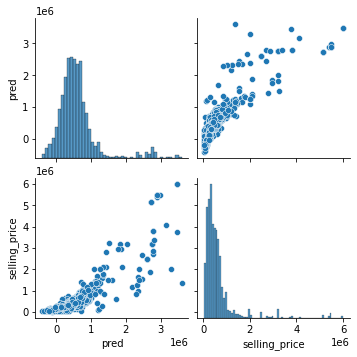

In [1369]:
y_test_pred = y_test.copy()
y_test_pred["pred"] = y_pred
sns.pairplot(y_test_pred[["pred", "selling_price"]])

In [1371]:
lr.coef_

array([[-6.20240361e+05, -1.28275429e+00, -1.49732752e+02,
         1.73490102e+02,  3.77996389e+03,  1.35228933e+03,
        -5.54672106e+01,  1.65478116e+02,  5.27420190e+03,
         2.65752831e+00, -6.48242835e+04,  6.16332216e+03,
         8.38254336e+04, -2.51644723e+04,  3.51792458e+04,
        -3.70756337e+04,  1.89638790e+03,  9.57755785e+04,
        -9.57755785e+04, -8.40810425e+05, -8.69238428e+05,
         1.71004885e+06, -1.51346341e+05,  3.53113365e+05,
         1.77188668e+04, -1.31899900e+05,  2.12053825e+04,
         4.78850078e+03, -9.53990062e+04,  1.83197167e+04,
        -3.65005848e+04,  7.48113376e+05, -3.11365655e+05,
        -4.36747721e+05]])

In [1382]:
list(lr.coef_[0])

[-620240.3607285181,
 -1.28275428506575,
 -149.73275158439114,
 173.49010203353342,
 3779.9638925294116,
 1352.2893319490945,
 -55.46721056883866,
 165.47811573410084,
 5274.201900472083,
 2.6575283123375306,
 -64824.2834598437,
 6163.322159234779,
 83825.4335649494,
 -25164.47226400273,
 35179.24579323463,
 -37075.63369845889,
 1896.3879048778851,
 95775.57849800178,
 -95775.5784980374,
 -840810.424972111,
 -869238.4281682228,
 1710048.8531378603,
 -151346.34095751646,
 353113.36518889514,
 17718.866751783084,
 -131899.8998971848,
 21205.382459040775,
 4788.500775473999,
 -95399.00622823609,
 18319.716733057747,
 -36500.584825915714,
 748113.3755267432,
 -311365.65488170943,
 -436747.72064597585]

In [1372]:
import pickle

In [1383]:
data = {
    'coef_': list(lr.coef_[0]),
    'w0': lr.intercept_[0]
}
with open('data.pickle', 'wb') as f:
    pickle.dump(data, f)
    
with open('data.pickle', 'rb') as f:
    data_new = pickle.load(f)
    
print(data_new)

{'coef_': [-620240.3607285181, -1.28275428506575, -149.73275158439114, 173.49010203353342, 3779.9638925294116, 1352.2893319490945, -55.46721056883866, 165.47811573410084, 5274.201900472083, 2.6575283123375306, -64824.2834598437, 6163.322159234779, 83825.4335649494, -25164.47226400273, 35179.24579323463, -37075.63369845889, 1896.3879048778851, 95775.57849800178, -95775.5784980374, -840810.424972111, -869238.4281682228, 1710048.8531378603, -151346.34095751646, 353113.36518889514, 17718.866751783084, -131899.8998971848, 21205.382459040775, 4788.500775473999, -95399.00622823609, 18319.716733057747, -36500.584825915714, 748113.3755267432, -311365.65488170943, -436747.72064597585], 'w0': 579050256.7359445}


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [1370]:
def business_metrics(y_test, y_pred):
    return f"{len(y_test[abs(y_test.selling_price - pd.Series(list(y_pred)))/y_test.selling_price  * 100 <= 10])/len(y_test) * 100}%"

business_metrics(y_test, y_pred)

'28.000000000000004%'

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

К сожалению, я так и не смог разобраться как это сделать. Есть некоторые стоп факторы в виде:
1) Не могу полноценно выполнять задания по разработке из-за отсутствия доступов к своему единственному (рабочему) компу **(основное)**

2) Из курса разработки мало что практичеси применимого (или понятного мне) удалось вынести, разобраться очень тяжело.

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link